# Colab 설정

In [113]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# 할당된 GPU 실행
import tensorflow as tf
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "0"
gpus = tf.config.experimental.list_physical_devices("GPU")

if gpus:
    try:
    # GPU 메모리 사용 설정
    tf.config.experimental.set_memory_growth(gpus[0], True)  
    except RuntimeError as re:
    print(re)

# GPU 메모리를 전부 할당하지 않고 필요에 따라 자동으로 할당하도록 설정
from tensorflow.compat.v1 import ConfigProto, InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config = config)

# Yolo v5 설정

In [ ]:
# 현재 디렉토리 출력
%pwd

In [ ]:
# 지금 디렉터리 내 존재하는 디렉토리 리스트 출력
%ls

In [ ]:
# 해당 경로로 이동
%cd drive/MyDrive/Auto_Farming

#### Git-Hub 에서 yolo 다운로드 

In [1]:
!git clone https://github.com/ultralytics/yolov5

'yolov5'에 복제합니다...
remote: Enumerating objects: 14995, done.
remote: Total 14995 (delta 0), reused 0 (delta 0), pack-reused 14995
오브젝트를 받는 중: 100% (14995/14995), 14.07 MiB | 19.17 MiB/s, 완료.
델타를 알아내는 중: 100% (10286/10286), 완료.


#### Yolo를 사용한데 필요한 라이브러리 설치

In [1]:
%pwd

'/Users/choiyungyu/Library/Mobile Documents/com~apple~CloudDocs/AI-school/pr.Auto-Farming'

In [2]:
%cd yolov5/
!pip install -r requirements.txt  # requirements.txt 안에 적혀있음

/Users/choiyungyu/Library/Mobile Documents/com~apple~CloudDocs/AI-school/pr.Auto-Farming/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 kB 4.6 MB/s eta 0:00:00a 0:00:01
  Using cached opencv_python-4.7.0.68-cp37-abi3-macosx_10_13_x86_64.whl (51.7 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 MB 19.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 30.9 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 3.4.11.45
    Uninstalling opencv-python-3.4.11.45:
      Successfully uninstalled opencv-python-3.4.11.45


# 데이터 로드

In [ ]:
%cd ../
%pwd

In [2]:
# make directory
%mkdir dataset

#### Roboflow에서 라벨링한 데이터 다운로드

In [1]:
!curl -L "https://app.roboflow.com/ds/XglPwSifXL?key=AU3AnbzfQU" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   902  100   902    0     0    298      0  0:00:03  0:00:03 --:--:--   298
100 1741k  100 1741k    0     0   440k      0  0:00:03  0:00:03 --:--:-- 13.0M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/IMG_0879_JPG.rf.eb55df94b109238039f01e67bac9b45c.jpg  
 extracting: test/images/IMG_0888_JPG.rf.80610cfa901d310eb25516136ef82c2b.jpg  
 extracting: test/images/KakaoTalk_20221031_144727497_08_jpg.rf.f0e6c15f9c872eed564a7393dcb764aa.jpg  
 extracting: test/images/KakaoTalk_20221031_144727497_11_jpg.rf.8b4f10ebf30767736778bf7f0888b461.jpg  
 extracting: test/images/KakaoTalk_20221031_144727497_14_jpg.rf.7d943b2b0379ec2eaffde8d14a224bae.jpg  
 extracting: test/images/KakaoTal

In [90]:
# 데이터 셋을 위에 만든 디렉터리로 이동
%mv ./README.dataset.txt ./README.roboflow.txt ./data.yaml train test valid /content/drive/MyDrive/Auto_Farming/dataset

In [91]:
# 파일 내용 보기
%cat /content/drive/MyDrive/Auto_Farming/dataset/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 2
names: ['Ginseng', 'head']

roboflow:
  workspace: yungyu-choi-urac0
  project: insam
  version: 10
  license: CC BY 4.0
  url: https://universe.roboflow.com/yungyu-choi-urac0/insam/dataset/10

In [92]:
from glob import glob  # 많은 파일들을 다룰때 사용

train_img_list = glob('/content/drive/MyDrive/Auto_Farming/dataset/train/images/*.jpg')
test_img_list = glob('/content/drive/MyDrive/Auto_Farming/dataset/test/images/*.jpg')
valid_img_list = glob('/content/drive/MyDrive/Auto_Farming/dataset/valid/images/*.jpg')
len(valid_img_list)

9

In [ ]:
# 모든 이미지 경로를 하나의 파일에 담기, train.txt, val.txt 파일에 각각 담아줌
with open('/content/drive/MyDrive/Auto_Farming/dataset/train.txt', 'w') as f:
  f.write('\n'.join(train_img_list) + '\n')

with open('/content/drive/MyDrive/Auto_Farming/dataset/val.txt', 'w') as f:
  f.write('\n'.join(valid_img_list) + '\n')

In [95]:
# data.yaml 파일 불러와서 수정
import yaml

with open('/content/drive/MyDrive/Auto_Farming/dataset/data.yaml','r') as f:
  data = yaml.safe_load(f)

print(data)

{'train': '../train/images', 'val': '../valid/images', 'test': '../test/images', 'nc': 2, 'names': ['Ginseng', 'head'], 'roboflow': {'workspace': 'yungyu-choi-urac0', 'project': 'insam', 'version': 10, 'license': 'CC BY 4.0', 'url': 'https://universe.roboflow.com/yungyu-choi-urac0/insam/dataset/10'}}


In [96]:
data['train'] = '/content/drive/MyDrive/Auto_Farming/dataset/train.txt'
data['val'] = '/content/drive/MyDrive/Auto_Farming/dataset/val.txt'
data

{'train': '/content/drive/MyDrive/Auto_Farming/dataset/train.txt',
 'val': '/content/drive/MyDrive/Auto_Farming/dataset/val.txt',
 'test': '../test/images',
 'nc': 2,
 'names': ['Ginseng', 'head'],
 'roboflow': {'workspace': 'yungyu-choi-urac0',
  'project': 'insam',
  'version': 10,
  'license': 'CC BY 4.0',
  'url': 'https://universe.roboflow.com/yungyu-choi-urac0/insam/dataset/10'}}

In [97]:
# data를 yaml파일에 덮어쓰기
with open('/content/drive/MyDrive/Auto_Farming/dataset/data.yaml','w') as f:
  yaml.dump(data,f)

# 전이 학습

In [ ]:
%pwd

In [3]:
%cd 

C:\Users\AI\Auto_Farming


In [4]:
import os 
os.getcwd()

'C:\\Users\\AI\\Auto_Farming'

In [ ]:
# 학습 모듈이 있는 dir로 이동
%cd yolov5

In [100]:
# 학습 모듈 실행

#경고 무시
import warnings
warnings.filterwarnings("ignore")


train = 'train.py' # 사용할 파이썬 파일
data = '/content/drive/MyDrive/Auto_Farming/dataset/data.yaml' # 사용할 데이터를 적어둔 yaml file
cfg = './models/yolov5s.yaml' # 사용할 모델 구조 (x>l>n>m>s)
weights = '/content/drive/MyDrive/Auto_Farming/yolov5/runs/train/insam_yolov5s_results/weights/best.pt' # 사용할 가중치
name = 'insam_yolov5s_results' # 학습 결과를 저장할 폴더 이름

!python {train} --img 448 --batch 128 --epochs 1000 --data {data} --cfg {cfg} --weights {weights} --name {name}

train: weights=/content/drive/MyDrive/Auto_Farming/yolov5/runs/train/insam_yolov5s_results/weights/best.pt, cfg=./models/yolov5s.yaml, data=/content/dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=1, batch_size=128, imgsz=448, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=insam_yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-219-ga83d2a5 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias

## 학습 결과 해석
- gpu_mem : 사용한 그래픽카드 메모리
- box_loss : 영역추정을 얼마나 잘 했는지
- obj_loss : 객체탐지를 얼마나 잘 했는지 
- mAP50 : 영역안 타겟 추측 확률이 50%이하인 것의 정확도?
- mAP50-95 : 영역 안 타겟의 추측 확률이 50~95 사이인 것들의 정확도?

# 평가

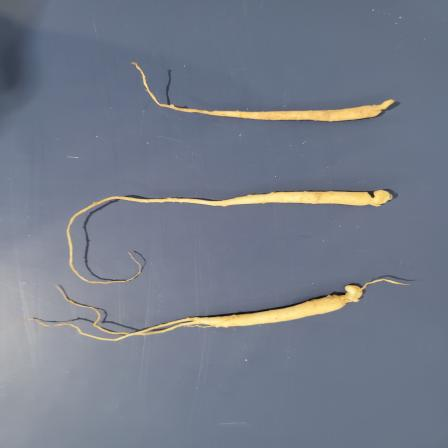

In [108]:
from IPython.display import Image
test_img = test_img_list[5]
Image(test_img)

In [112]:
# 실행의 결과를 변수에 담음
# 사용할 파이썬
python_d = 'detect.py'
# 사용할 가중치
weights = '/content/drive/MyDrive/Auto_Farming/yolov5/runs/train/insam_yolov5s_results/weights/best.pt'
# conf : confidence(추정 영역 내 타겟이 있을 확률 / 컨피던스가 몇 이상인 것을 표시할지)
# source : 판별에 사용할 소스
rs = !python {python_d} --weights {weights} --img 448 --conf 0.4 --source "{test_img}"

In [122]:
rs

["\x1b\x1bdetect: \x1bweights=['/content/drive/MyDrive/Auto_Farming/yolov5/runs/train/insam_yolov5s_results/weights/best.pt'], source=/content/drive/MyDrive/Auto_Farming/dataset/test/images/KakaoTalk_20221031_144727497_jpg.rf.2947b6e0b42def47cb959dcc4f6e7ffb.jpg, data=data/coco128.yaml, imgsz=[448, 448], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1",
 'YOLOv5 🚀 v6.2-219-ga83d2a5 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)',
 '',
 'Fusing layers... ',
 'YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs',
 'image 1/1 /content/drive/MyDrive/Auto_Farming/dataset/test/images/KakaoTalk_20221031_144727497_jpg.rf.2947b6e0b42def47cb959dcc4f6e7ffb.jpg: 4

# 웹캠 연결

In [ ]:
!python detect.py --weight ./runs/train/insam_yolov5s_results/weights/best.pt --source 1